<a href="https://colab.research.google.com/github/VigneshwaraChinnadurai/ML-Learning/blob/master/Session_9_Random_Forest_Regression/Random_Forest_Regression_ml_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#STEP-1: Install Import Libraries
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#STEP-3: Get File from Drive using file-ID

#2.1 Get the file
downloaded = drive.CreateFile({'id':'1T6JMGO3UmASqA_V17GAX1406ycM6oI_B'})
# replace the id with id of file you want to access
downloaded.GetContentFile('Position_Salaries_SVR.csv') 

#STEP-4: Read File

#3.1 Read file as panda dataframe
import pandas as pd
data = pd.read_csv('Position_Salaries_SVR.csv') 
print(data.head())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
x=data.iloc[:,1:2].values
y=data.iloc[:,2].values

In [4]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=300,random_state=0) 
#increase the n_estimator from 10 (default) to 100,300 to increase trees
regressor.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [0]:
y_pred=regressor.predict([[6.5]])

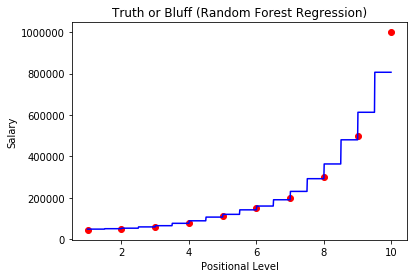

In [6]:
# Increasing the resolution by griding with 0.01
x_grid=np.arange(min(x),max(x),0.01)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(x,y,c='red')
plt.plot(x_grid,regressor.predict(x_grid),c='blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Positional Level')
plt.ylabel('Salary')
plt.show()